In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import pandas as pd

# Veri setini yükleyelim (örneğin Kaggle'dan indirdiğiniz 'araba_fiyatlari.csv' dosyası)
df = pd.read_csv('/kaggle/input/car-prices-poland/Car_Prices_Poland_Kaggle.csv')

# Verinin ilk 5 satırını görelim
print(df.head())

# Veri seti hakkında genel bilgi alalım (sütun tipleri, boş değerler vb.)
print(df.info())

# Sayısal sütunların istatistiksel özetini görelim (ortalama, standart sapma vb.)
print(df.describe())

# Eksik veri var mı kontrol edelim
print(df.isnull().sum())

   Unnamed: 0  mark  model generation_name  year  mileage  vol_engine    fuel  \
0           0  opel  combo      gen-d-2011  2015   139568        1248  Diesel   
1           1  opel  combo      gen-d-2011  2018    31991        1499  Diesel   
2           2  opel  combo      gen-d-2011  2015   278437        1598  Diesel   
3           3  opel  combo      gen-d-2011  2016    47600        1248  Diesel   
4           4  opel  combo      gen-d-2011  2014   103000        1400     CNG   

              city     province  price  
0            Janki  Mazowieckie  35900  
1         Katowice      Śląskie  78501  
2            Brzeg     Opolskie  27000  
3        Korfantów     Opolskie  30800  
4  Tarnowskie Góry      Śląskie  35900  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117927 entries, 0 to 117926
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Unnamed: 0       117927 non-null  int64 
 1   mark         

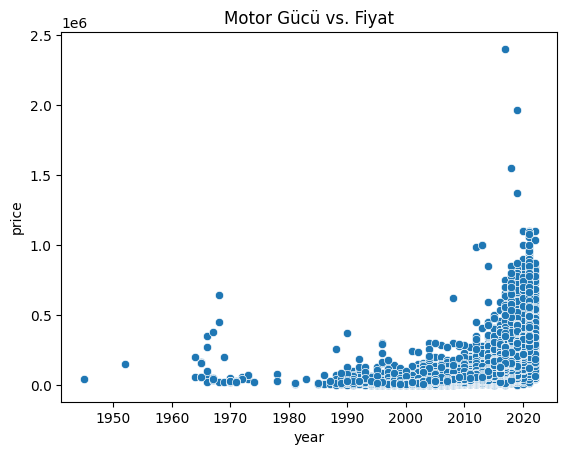

Sütun Veri Tipleri:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117927 entries, 0 to 117926
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Unnamed: 0       117927 non-null  int64 
 1   mark             117927 non-null  object
 2   model            117927 non-null  object
 3   generation_name  87842 non-null   object
 4   year             117927 non-null  int64 
 5   mileage          117927 non-null  int64 
 6   vol_engine       117927 non-null  int64 
 7   fuel             117927 non-null  object
 8   city             117927 non-null  object
 9   province         117927 non-null  object
 10  price            117927 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 9.9+ MB
None
------------------------------


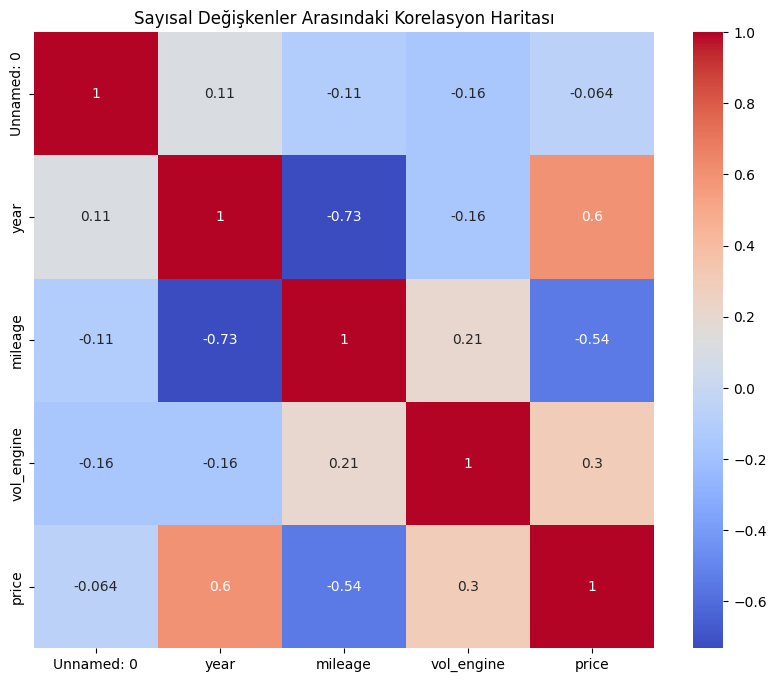

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x='year', y='price', data=df)
plt.title('Motor Gücü vs. Fiyat')
plt.show()




# Önce veri setinizdeki sütun tiplerini görmek iyi bir pratiktir.
print("Sütun Veri Tipleri:")
print(df.info())
print("-" * 30)


# --- DÜZELTİLMİŞ KOD ---
# .corr() metoduna numeric_only=True parametresini ekleyin.
# Bu, sadece sayısal sütunları seçerek korelasyonu hesaplar.
correlation_matrix = df.corr(numeric_only=True)

# Tüm sayısal değişkenler arasındaki korelasyonu görmek için bir ısı haritası (heatmap)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Sayısal Değişkenler Arasındaki Korelasyon Haritası')
plt.show()

In [4]:
print(df.columns)

Index(['Unnamed: 0', 'mark', 'model', 'generation_name', 'year', 'mileage',
       'vol_engine', 'fuel', 'city', 'province', 'price'],
      dtype='object')


In [5]:
# Şimdilik basit bir model için tek bir özellik seçelim: motor_gucu
from datetime import datetime
mevcut_yil = datetime.now().year
df['yas'] = mevcut_yil - df['year']

# Artık 'yas' sütununu da modelinize ekleyebilirsiniz.
# Örnek: 'motor_gucu', 'yil', 'kilometre' gibi birden fazla sütun seçin
ozellikler = ['yas', 'vol_engine', 'mileage']
X = df[ozellikler]
y = df['price']
# 'vites_turu' gibi bir sütunu sayısal hale getirelim
# drop_first=True, gereksiz bir sütun oluşmasını engeller

# Artık yeni oluşan sütunları da X'e ekleyebilirsiniz.

# Sonraki adımları (train_test_split, model.fit vb.) bu yeni X ile tekrarlayın

In [6]:
from sklearn.model_selection import train_test_split

# Verinin %80'i eğitim, %20'si test için ayrılır. random_state, sonucun tekrarlanabilir olmasını sağlar.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
from sklearn.linear_model import LinearRegression

# Lineer regresyon modelini oluştur
model = LinearRegression()

# Modeli eğitim verileriyle eğit (fit et)
model.fit(X_train, y_train)

print("Model başarıyla eğitildi!")

Model başarıyla eğitildi!


In [9]:
# Test verilerini kullanarak tahmin yap
y_pred = model.predict(X_test)

# Modelin performans metriklerini hesaplayalım
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Ortalama Mutlak Hata (MAE): {mae}")
print(f"Ortalama Kare Hata (MSE): {mse}")
print(f"Kök Ortalama Kare Hata (RMSE): {rmse}")
print(f"R-Kare (R² Score): {r2}")

Ortalama Mutlak Hata (MAE): 32835.53816706182
Ortalama Kare Hata (MSE): 2974511532.855709
Kök Ortalama Kare Hata (RMSE): 54539.08261839127
R-Kare (R² Score): 0.5759431987693451


/tmp/ipykernel_35/1488684139.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red')


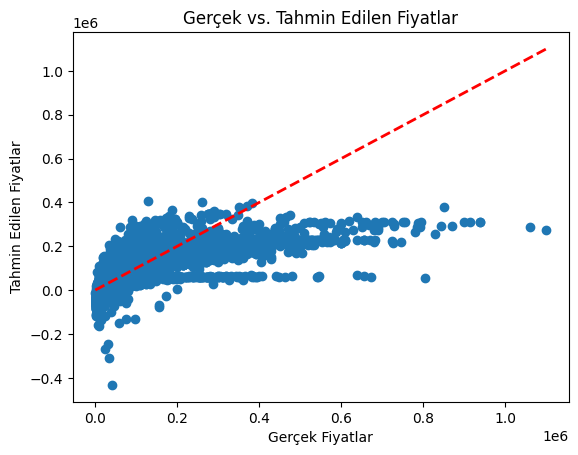

Modelin Katsayısı (slope): -6589.298314935002
Modelin Kesişim Noktası (intercept): 86262.62028216649


In [10]:
# Gerçek değerler ile tahmin edilen değerleri karşılaştıran bir grafik
plt.scatter(y_test, y_pred)
plt.xlabel("Gerçek Fiyatlar")
plt.ylabel("Tahmin Edilen Fiyatlar")
plt.title("Gerçek vs. Tahmin Edilen Fiyatlar")
# Mükemmel bir tahmin için noktaların üzerinde olacağı kırmızı bir çizgi ekleyelim
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red')
plt.show()

# Modelin katsayısını (coefficient) ve kesişim noktasını (intercept) görelim
print(f"Modelin Katsayısı (slope): {model.coef_[0]}")
print(f"Modelin Kesişim Noktası (intercept): {model.intercept_}")